In [665]:
import pandas as pd

In [997]:
# загрузим файл в датафрейм
test_analyst = pd.read_csv('test_analyst.csv')
test_analyst.drop(['Unnamed: 0'], axis=1, inplace=True)
test_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4613513 entries, 0 to 4613512
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   us_id         object
 1   event_name    object
 2   created_at    int64 
 3   installed_at  int64 
dtypes: int64(2), object(2)
memory usage: 140.8+ MB


In [998]:
#проверим пустые значения в датасете
test_analyst.isna().sum()

us_id           0
event_name      0
created_at      0
installed_at    0
dtype: int64

In [999]:
# трансформируем юникс форму в timestarm 
test_analyst[['installed_timestamp'
    , 'created_timestamp']] = test_analyst[['installed_at'
            , 'created_at']].apply(lambda x:
pd.to_datetime(x, unit='s'))

In [1000]:
# оставим только дату
test_analyst[['installed_date'
    , 'created_date']] = test_analyst[['installed_timestamp'
    , 'created_timestamp']].apply(lambda x: x.dt.date)
test_analyst

,us_id,event_name,created_at,installed_at,installed_timestamp,created_timestamp,installed_date,created_date
0,4C7FF05C7B7386918022,ad_banner_impression,1527035110,1526425759,2018-05-15 23:09:19,2018-05-23 00:25:10,2018-05-15,2018-05-23
1,4C7FF05C7B7386918022,ad_banner_impression,1527035125,1526425759,2018-05-15 23:09:19,2018-05-23 00:25:25,2018-05-15,2018-05-23
2,4C7FF05C7B7386918022,ad_banner_impression,1527035140,1526425759,2018-05-15 23:09:19,2018-05-23 00:25:40,2018-05-15,2018-05-23
3,4C7FF05C7B7386918022,ad_banner_impression,1527035154,1526425759,2018-05-15 23:09:19,2018-05-23 00:25:54,2018-05-15,2018-05-23
4,4C7FF05C7B7386918022,ad_banner_impression,1527035171,1526425759,2018-05-15 23:09:19,2018-05-23 00:26:11,2018-05-15,2018-05-23
...,...,...,...,...,...,...,...,...
4613508,FD9EB87E526641884346,ad_start_session,1526131366,1526075247,2018-05-11 21:47:27,2018-05-12 13:22:46,2018-05-11,2018-05-12
4613509,EE482FA71718FB0AED5B,ad_start_session,1526087310,1525314328,2018-05-03 02:25:28,2018-05-12 01:08:30,2018-05-03,2018-05-12
4613510,EE482FA71718FB0AED5B,ad_start_session,1526089262,1525314328,2018-05-03 02:25:28,2018-05-12 01:41:02,2018-05-03,2018-05-12
4613511,41F14FBC65BD97FFB639,ad_start_session,1526132752,1525918521,2018-05-10 02:15:21,2018-05-12 13:45:52,2018-05-10,2018-05-12


## 1. Задание
Рассчитать DAU для каждого дня, период 18.05 - 01.06

In [1041]:
#создадим сводную таблицу, чтобы посмотреть DAU (посчитаем уникальных пользователей (us_id) 
# через функцию nunique())
DAU = test_analyst.pivot_table(index='created_date', values='us_id', aggfunc=['nunique'])
DAU

,nunique
,us_id
created_date,
2018-05-01,591
2018-05-02,824
2018-05-03,924
2018-05-04,1023
2018-05-05,1184
2018-05-06,1339
2018-05-07,1435
2018-05-08,1535


In [1040]:
DAU.to_csv('DAU.tsv', sep='\t')

## 2. Задание
Рассчитать накопительные показы на юзера по типам рекламы до 12 дня жизни когорты. Данные должны быть в виде таблицы, где названия строк — это дата установки, а названия столбцов — день жизни когорты. 2й столбец таблицы - Кол-во юзеров в когорте 

In [1002]:
# посчитаем размер когорт для каждой даты установки через функцию groupby()
test_analyst['cht_size'] = test_analyst.groupby('installed_date').us_id.transform('nunique')

In [1003]:
# lifetime (день жизни когорты) временной промежуток между установкой и любым ивентом в игре 
test_analyst['lifetime'] = (test_analyst.created_date - test_analyst.installed_date).dt.days

In [1004]:
# посмотим какие значения у нас получились
test_analyst.lifetime.value_counts()

 0     669440
 1     442750
 2     293800
 3     251858
 4     213039
 5     178609
 6     167061
 7     153053
 8     148282
 14    145249
 13    141042
 9     137410
 11    134714
 10    133621
 12    132922
 15    125560
 16    122396
 18    115666
 17    115245
 19    101871
 20     96872
 21     88675
 22     77264
 23     68510
 25     68282
 24     67935
 26     58329
 27     50238
 28     37477
 29     32079
 30     24332
 31     13887
 32      6044
-1          1
Name: lifetime, dtype: int64

In [1005]:
# есть один пользователь, где жизни когорты меньше 0, но один поэтому не будем на это обращать внимание
test_analyst.loc[test_analyst['lifetime'] == -1]

,us_id,event_name,created_at,installed_at,installed_timestamp,created_timestamp,installed_date,created_date,cht_size,lifetime
390893,0F20E1B6F82E978B99E4,ad_start_session,1525651193,1525651204,2018-05-07 00:00:04,2018-05-06 23:59:53,2018-05-07,2018-05-06,513,-1


In [1006]:
# функция вывода сводной таблицы по накопительным показам
def prepare_pivot_table(data, event_name):
    # data - датасет откуда достаем данные
    # event_name - название ивента в таблице
    
    #сводная таблица
    # фильтруем по event_name - берем только те поля, где присутствует указанный ивент
    # в качестве группировки по строкам берем дату установки (installed_date) и размер когорты (cht_size)
    # по столбцам берем день жизни когорты
    # считаем количество показов, которое было сделано через us_id и функцию count 
    pivot_table = data.query(f'event_name=="{event_name}"').pivot_table(index=['installed_date'
            , 'cht_size'], columns='lifetime', values='us_id', aggfunc='count')
    
    # куммулятивно складываем значения по столбцам
    # обновляем индексы reset_index(), чтобы installed_date и cht_size стали столбцами
    pivot_table = pivot_table.cumsum(axis=1).reset_index()
    
    # сохраняем в отдельный датасет столбцы installed_date и cht_size
    df = pivot_table.iloc[:, :2]
    
    #считаем накопительные показы на юзера, делим накопленные показы по дням жизни на размер когорты (cht_size)
    df2 = pivot_table.iloc[:,2:].div(pivot_table.cht_size, axis=0)
    
    #возвращаем финальную таблицу из двух датафреймов
    return pd.concat([df, df2], axis=1)

In [1022]:
banner_ad = prepare_pivot_table(test_analyst, 'ad_banner_impression')
banner_ad.to_csv('cum_user_banner_ad.tsv', sep='\t', index=False)

In [1026]:
banner_ad

lifetime,installed_date,cht_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,2018-05-01,599,105.89,168.11,210.94,247.45,282.60,310.64,326.53,341.07,356.16,371.68,385.04,398.75,414.36,428.34,443.54,460.38,470.69,483.10,496.43,506.34,514.39,523.30,531.66,540.28,550.79,565.33,579.28,590.84,599.72,614.25,630.41,643.81,653.19
1,2018-05-02,572,77.25,127.03,161.61,194.89,220.83,241.10,257.17,269.52,282.67,293.84,306.50,315.15,325.55,333.16,344.08,351.60,358.54,366.51,372.63,380.83,388.15,394.33,399.63,407.10,417.66,430.07,440.86,450.98,459.97,470.66,477.97,486.80,NaN
2,2018-05-03,504,84.72,147.90,195.20,237.64,272.62,300.75,324.05,344.25,364.64,385.56,400.25,416.71,432.68,455.61,476.10,488.68,504.51,525.00,540.23,558.27,576.08,595.11,610.59,630.21,648.24,668.85,689.23,706.13,727.46,744.36,762.44,NaN,NaN
3,2018-05-04,455,77.24,131.97,164.04,197.94,218.84,236.04,254.86,273.93,288.00,303.62,320.73,337.67,353.39,371.64,381.24,394.24,407.36,418.30,432.42,446.75,465.85,480.91,495.76,513.24,537.74,561.12,578.35,599.01,615.75,631.10,NaN,NaN,NaN
4,2018-05-05,533,81.89,143.46,174.68,197.23,215.27,228.52,245.81,262.26,279.82,292.18,307.17,318.50,328.38,338.20,351.83,363.11,371.53,378.43,390.77,400.05,412.73,425.71,441.33,451.00,462.47,472.15,486.20,498.38,510.45,NaN,NaN,NaN,NaN
5,2018-05-06,583,84.36,135.63,163.86,183.24,201.24,219.18,238.06,254.76,266.95,279.84,294.95,308.20,318.26,332.80,345.26,357.77,369.72,380.60,392.28,403.44,418.53,434.80,449.65,462.66,475.86,496.34,511.27,529.03,NaN,NaN,NaN,NaN,NaN
6,2018-05-07,513,62.88,106.34,136.36,160.70,185.13,206.20,222.81,239.62,252.31,268.01,279.17,291.99,303.30,314.93,327.68,338.70,349.52,359.26,369.64,381.61,397.01,410.07,421.03,433.27,447.40,458.20,470.58,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-08,502,61.83,99.08,121.59,143.45,160.15,177.67,193.39,207.68,221.66,233.27,247.47,255.77,265.37,274.65,290.49,301.89,311.36,321.56,328.58,340.24,351.85,365.34,379.84,391.48,400.77,410.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-05-09,541,52.63,82.21,103.01,119.79,137.62,149.66,165.56,181.49,197.26,210.69,220.58,230.24,242.46,256.25,266.05,275.02,290.24,300.64,310.84,318.69,329.14,338.96,349.16,362.56,373.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-05-10,452,66.68,111.85,138.96,167.62,191.32,210.50,232.18,247.25,266.86,277.61,291.88,310.85,324.25,337.70,348.04,360.22,372.28,389.31,406.37,423.77,439.53,455.86,471.90,482.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1025]:
inter_ad = prepare_pivot_table(test_analyst, 'ad_interstitial_impression')
inter_ad.to_csv('cum_user_inter_ad.tsv', sep='\t', index=False)

In [1010]:
inter_ad

lifetime,installed_date,cht_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,2018-05-01,599,2.81,4.28,5.33,6.33,7.13,7.79,8.30,8.81,9.33,9.91,10.39,10.96,11.51,12.08,12.61,13.10,13.51,13.95,14.40,14.79,15.13,15.39,15.72,16.02,16.29,16.71,17.07,17.39,17.71,18.15,18.62,18.96,19.26
1,2018-05-02,572,2.30,3.67,4.52,5.25,5.94,6.60,7.12,7.62,8.09,8.43,8.88,9.25,9.68,10.00,10.35,10.66,10.95,11.26,11.54,11.83,12.16,12.45,12.65,12.94,13.29,13.68,13.97,14.27,14.55,14.88,15.12,15.37,NaN
2,2018-05-03,504,2.41,4.10,5.26,6.12,7.14,7.95,8.70,9.49,10.32,11.08,11.56,12.22,12.73,13.29,13.96,14.45,14.99,15.44,15.90,16.49,17.00,17.50,17.89,18.33,18.70,19.17,19.56,19.97,20.39,20.74,21.13,NaN,NaN
3,2018-05-04,455,2.22,3.57,4.60,5.66,6.51,7.34,8.00,8.69,9.24,9.76,10.35,11.02,11.60,12.38,12.81,13.26,13.69,14.15,14.71,15.29,15.96,16.45,16.86,17.30,17.92,18.53,18.98,19.60,20.04,20.50,NaN,NaN,NaN
4,2018-05-05,533,2.55,4.42,5.49,6.23,6.84,7.35,7.90,8.66,9.35,9.81,10.31,10.67,10.98,11.38,11.85,12.26,12.57,12.85,13.25,13.53,13.96,14.28,14.71,14.94,15.26,15.48,15.89,16.26,16.63,NaN,NaN,NaN,NaN
5,2018-05-06,583,2.74,4.25,5.17,5.94,6.67,7.19,7.79,8.29,8.81,9.30,9.77,10.21,10.59,11.02,11.40,11.76,12.16,12.55,12.92,13.28,13.69,14.07,14.44,14.74,15.07,15.55,15.94,16.31,NaN,NaN,NaN,NaN,NaN
6,2018-05-07,513,2.19,3.74,4.84,5.70,6.52,7.22,7.83,8.52,8.98,9.47,9.83,10.23,10.57,10.95,11.39,11.75,12.06,12.35,12.62,12.86,13.14,13.42,13.69,13.98,14.23,14.50,14.76,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-08,502,2.04,3.59,4.49,5.35,5.81,6.34,6.83,7.37,7.84,8.27,8.89,9.21,9.51,9.82,10.21,10.66,10.96,11.23,11.45,11.76,12.05,12.44,12.76,13.07,13.29,13.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-05-09,541,2.06,3.21,3.93,4.46,4.94,5.43,5.96,6.36,6.81,7.27,7.64,8.06,8.44,8.88,9.25,9.65,10.01,10.30,10.63,10.89,11.21,11.50,11.77,12.18,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-05-10,452,2.42,4.10,5.22,6.18,7.09,7.86,8.58,9.13,9.72,10.17,10.60,11.08,11.53,11.96,12.28,12.64,12.97,13.51,14.04,14.60,15.13,15.61,16.06,16.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Задание
Сделать прогноз накопительных показов баннера на юзера  и построить график в Python до 180 дня (для каждого дня) для когорты с датами установки 01.05 - 07.05

In [1011]:
#трансформируем installed_date в формат datetime 
banner_ad['installed_date'] = pd.to_datetime(banner_ad['installed_date'])
banner_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   installed_date  17 non-null     datetime64[ns]
 1   cht_size        17 non-null     int64         
 2   0               17 non-null     float64       
 3   1               17 non-null     float64       
 4   2               17 non-null     float64       
 5   3               17 non-null     float64       
 6   4               17 non-null     float64       
 7   5               17 non-null     float64       
 8   6               17 non-null     float64       
 9   7               17 non-null     float64       
 10  8               17 non-null     float64       
 11  9               17 non-null     float64       
 12  10              17 non-null     float64       
 13  11              17 non-null     float64       
 14  12              17 non-null     float64       
 15  13      

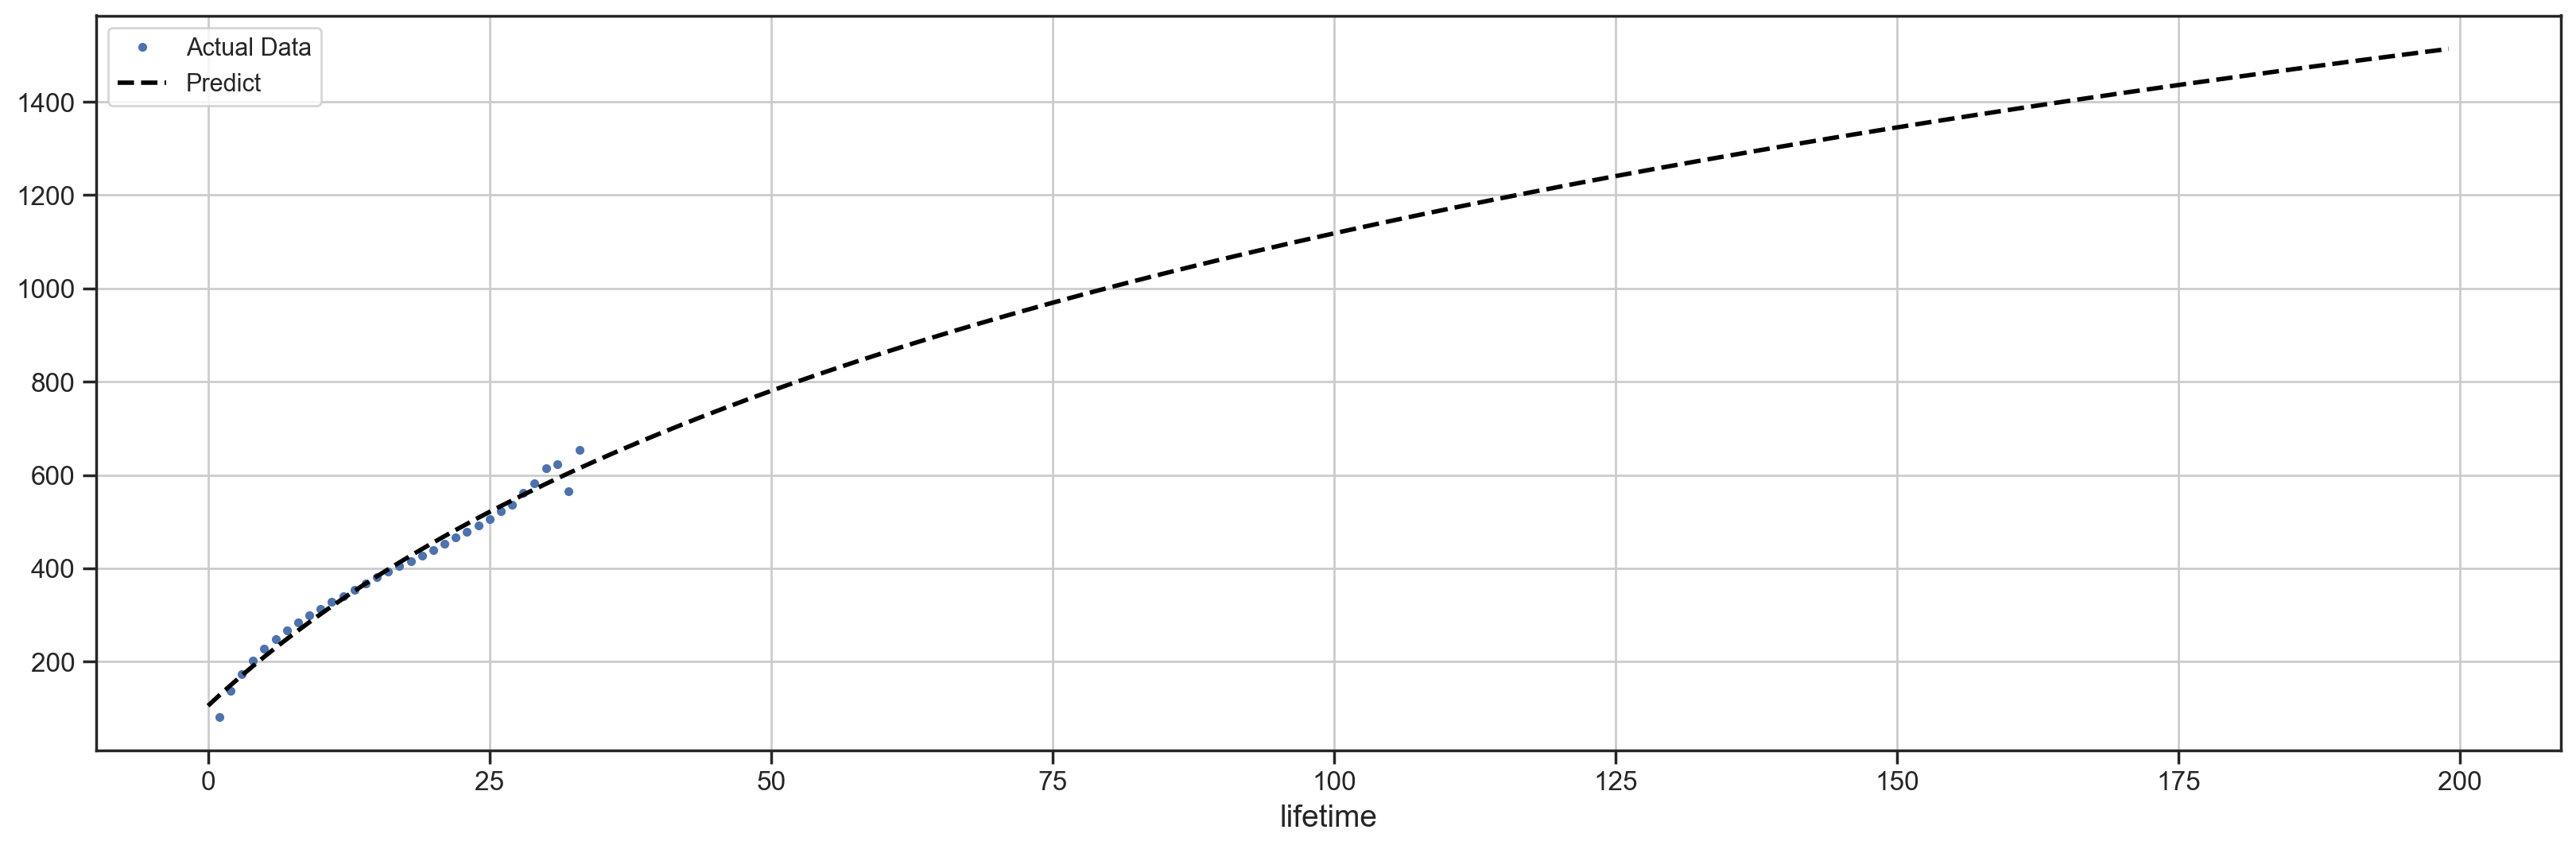

In [830]:
#воспользуемся модулем curve_fit для поиска функции накопительных показов баннера на юзера 
from scipy.optimize import curve_fit

# распределение данных на графике похоже на функцию логарифма, 
# поэтому будем строить прогноз по функции логарифма 
#(np.log1p, так как у нас по оси х, есть 0)
def l_func(x,a, b, c):
    return a * np.log1p(b * x) + c

# данные за накопительные показы на юзера, у нас уже есть. 
# Возьмем срез 1.05-7.05 и посчитаем среднюю по дням жизни
curve_ad = banner_ad.iloc[:7 , 2:].mean()

#день жизни когорты
x = curve_ad.index.astype(int)

#значения накопленных показов
y = curve_ad.values
curve_ad.plot(style='.', label='Actual Data')

#ищем подходящие коэффициент для нашей функции логарифма
pars, _ = curve_fit(f=l_func, xdata=x, ydata=y)

#берем жизни когорт до 200 дня
x = np.arange(0, 200, 1)

#строим прогноз
y_pred = l_func(x, *pars)

#переносим наш прогноз на график
plt.plot(x, y_pred, linestyle='--', linewidth=2, color='black', label='Predict')
plt.legend(loc='best')

In [781]:
#посчитаем метрики на сколько наш прогноз близок к актульным значениям
from sklearn.metrics import r2_score, mean_squared_error

print('R-squared:',r2_score(y, y_pred[:33]))
print('RMSE:',np.sqrt(mean_squared_error(y, y_pred[:33])))

R-squared: 0.9713358783193276
RMSE: 24.495709586776805


In [1031]:
pd.Series(y_pred).to_csv('predict_users_banner_ad.tsv',sep='\t')

In [1037]:
pd.Series(y_pred)

0       105.35
1       127.66
2       149.29
3       170.27
4       190.64
        ...   
195   1,501.10
196   1,504.20
197   1,507.28
198   1,510.36
199   1,513.42
Length: 200, dtype: float64

## 4 Задание
Рассчитать Retention rate до максимального дня жизни когорты
Данные должны быть в виде таблицы, где названия строк — это дата установки, а названия столбцов — день жизни когорты. 2й столбец таблицы - Кол-во юзеров в когорте

In [1033]:
#посмотрим какие ивенты у нас есть
test_analyst.groupby('event_name').us_id.nunique()

event_name
ad_banner_impression          7629
ad_interstitial_impression    6360
ad_start_session              8631
Name: us_id, dtype: int64

In [1034]:
#посчитаем количество уникальных пользователей по каждому дню жизни в когорте
pivot_table = test_analyst.pivot_table(index=['installed_date'
        , 'cht_size'], columns='lifetime', values='us_id', aggfunc='nunique').reset_index()

#установим 0 день жизни размером когорты
pivot_table.iloc[: , 3] = pivot_table['cht_size']


df = pivot_table.iloc[:, :2]
df2 = pivot_table.iloc[:,3:].div(pivot_table.cht_size, axis=0)

<AxesSubplot:xlabel='lifetime'>

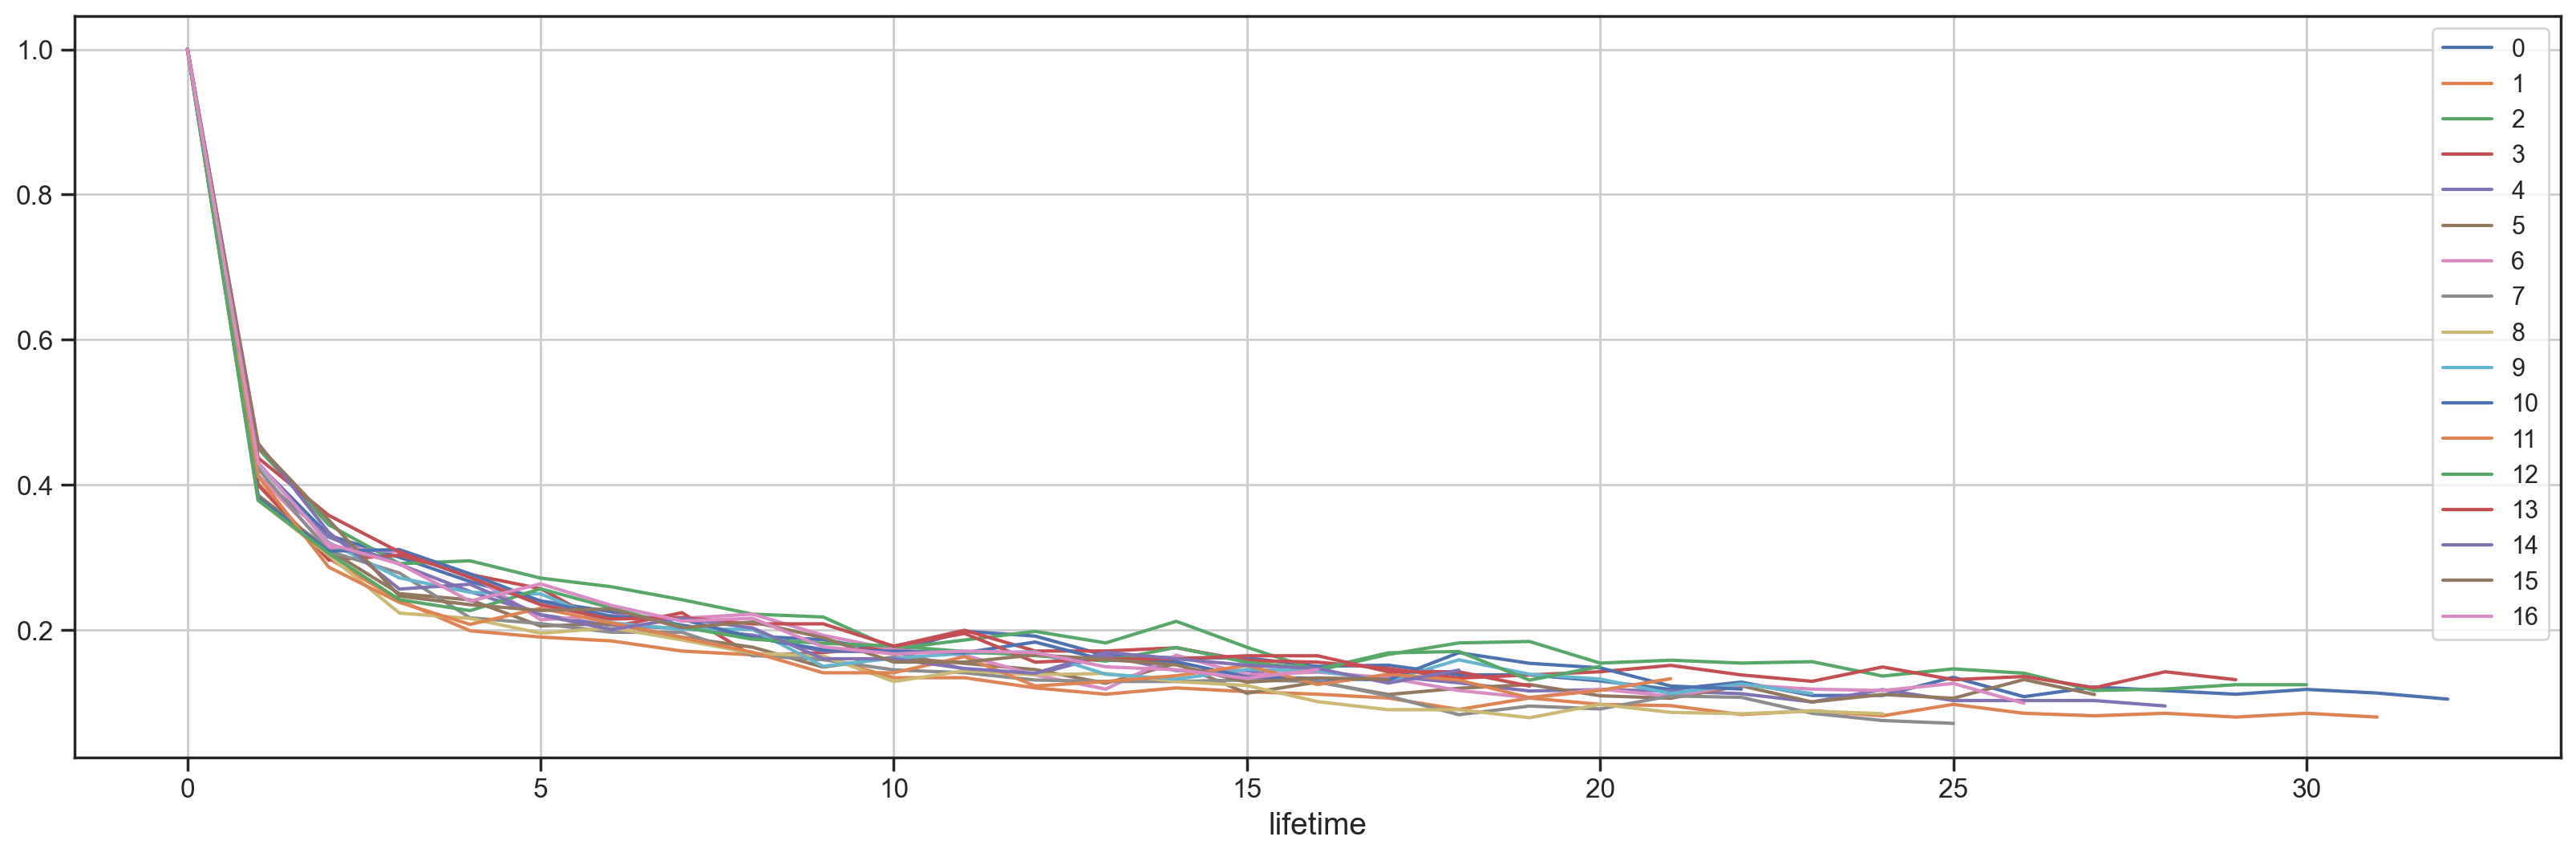

In [1035]:
#финальный датасет
retention = pd.concat([df, df2], axis=1)

retention.to_csv('retention.tsv', sep='\t', index=False)

retention.iloc[: ,2:].T.plot()

In [1036]:
retention

lifetime,installed_date,cht_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,2018-05-01,599,1.00,0.43,0.33,0.30,0.27,0.24,0.23,0.21,0.19,0.19,0.17,0.20,0.19,0.17,0.16,0.16,0.15,0.15,0.14,0.14,0.13,0.12,0.13,0.11,0.11,0.14,0.11,0.12,0.12,0.11,0.12,0.11,0.11
1,2018-05-02,572,1.00,0.40,0.30,0.24,0.20,0.19,0.19,0.17,0.17,0.16,0.13,0.13,0.12,0.11,0.12,0.12,0.11,0.11,0.09,0.11,0.10,0.10,0.08,0.09,0.08,0.10,0.09,0.08,0.09,0.08,0.09,0.08,NaN
2,2018-05-03,504,1.00,0.45,0.35,0.29,0.30,0.27,0.26,0.24,0.22,0.22,0.17,0.19,0.20,0.18,0.21,0.18,0.14,0.17,0.18,0.18,0.15,0.16,0.15,0.16,0.14,0.15,0.14,0.12,0.12,0.12,0.12,NaN,NaN
3,2018-05-04,455,1.00,0.40,0.30,0.30,0.28,0.26,0.20,0.22,0.16,0.17,0.18,0.20,0.17,0.17,0.18,0.16,0.16,0.15,0.13,0.14,0.14,0.15,0.14,0.13,0.15,0.13,0.14,0.12,0.14,0.13,NaN,NaN,NaN
4,2018-05-05,533,1.00,0.41,0.33,0.29,0.25,0.22,0.21,0.20,0.19,0.17,0.17,0.15,0.14,0.17,0.14,0.14,0.13,0.14,0.13,0.12,0.12,0.12,0.11,0.10,0.12,0.10,0.10,0.10,0.10,NaN,NaN,NaN,NaN
5,2018-05-06,583,1.00,0.39,0.31,0.25,0.24,0.21,0.21,0.19,0.18,0.15,0.16,0.15,0.15,0.13,0.15,0.11,0.13,0.11,0.12,0.13,0.11,0.11,0.12,0.10,0.11,0.11,0.13,0.11,NaN,NaN,NaN,NaN,NaN
6,2018-05-07,513,1.00,0.41,0.31,0.31,0.28,0.21,0.22,0.22,0.22,0.19,0.17,0.17,0.14,0.12,0.17,0.14,0.14,0.13,0.12,0.11,0.12,0.11,0.12,0.12,0.12,0.13,0.10,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-08,502,1.00,0.42,0.31,0.28,0.22,0.21,0.20,0.20,0.17,0.16,0.15,0.14,0.13,0.13,0.13,0.13,0.13,0.11,0.08,0.10,0.09,0.11,0.11,0.09,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-05-09,541,1.00,0.38,0.30,0.22,0.22,0.20,0.20,0.19,0.17,0.16,0.13,0.14,0.14,0.14,0.13,0.12,0.10,0.09,0.09,0.08,0.10,0.09,0.09,0.09,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-05-10,452,1.00,0.43,0.32,0.27,0.25,0.25,0.21,0.20,0.20,0.15,0.16,0.17,0.17,0.14,0.13,0.15,0.14,0.13,0.16,0.14,0.13,0.11,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5 Задание. А/В тест
Рассматриваем мобильную игру-головоломку с рекламной монетизацией и средним lifetime = 15 месяцев. На ней проводился эксперимент (в виде АБ теста) по внедрению нового типа рекламы. Для каждого пользователя есть данные о его заходе в игру и принесенной выручке по каждому типу рекламы за каждый день теста.
Нужно ответить на вопрос, стоит ли применять тестируемый функционал для всех игроков на проекте

### Проведем первичный анализ эксперимента

In [961]:
import seaborn as sns
import scipy.stats

In [447]:
#загрузим датасеты и предварительно обработаем данные
test_arpu = pd.read_csv('test_arpu.csv')
test_rr = pd.read_csv('test_rr.csv')

In [824]:
# возьмем только тех пользователей, у которых была сессия в игре в день теста
df = test_arpu.merge(test_rr, on=['user_id','abgroup','test_day'], how='inner')

In [833]:
# сколько пользователей в группах. Группы получились равномерными
df.groupby('abgroup').user_id.nunique()

abgroup
native_off_new    60637
native_on_new     60564
Name: user_id, dtype: int64

In [937]:
#добавим поле весь доход с одного пользователя за время эксперимента
df['total_rev'] = df.groupby('user_id').value.transform('sum')

In [938]:
#для удобства разделим на 2 датесета
control = df.query('abgroup=="native_off_new"')
test = df.query('abgroup=="native_on_new"')

In [879]:
#видно что произошел перелив дохода с других типов реклам в тип "ad_native_impression"
df.groupby(['abgroup','ad_type']).agg({'value': 'sum'})

value
abgroup        ad_type                            
native_off_new ad_banner_impression       3,893.18
               ad_interstitial_impression 6,525.91
               ad_native_impression           3.19
               ad_rewarded_impression     1,896.20
native_on_new  ad_banner_impression       3,698.52
               ad_interstitial_impression 5,798.84
               ad_native_impression       1,757.89
               ad_rewarded_impression     1,735.78

In [957]:
#посмотрим общий доход по всем типам реклам, в разных группах.
#Общий доход больше в тестовой группе. 
df.groupby(['abgroup']).agg({'value': 'sum'})

,value
abgroup,
native_off_new,"12,318.48"
native_on_new,"12,991.03"


In [987]:
# проверим нет ли пользователей которые попали в тест и контрол одновременно
n = set(control.user_id)-set(test.user_id)

In [988]:
#Пользователи в выборках разные
len(n)

60637

### Проверка эксперимента
Для оценки успешности эксперимента, будем рассматривать две метрики:
1. доход с пользователя (total_rev)
2. Общий доход в тесте и контроле по эксперименту

Для ответа на вопрос: стоит ли применять тестируемый функционал для всех игроков на проекте, воспользуемся непараметрическим методом Манна — Уитни, bootstrap

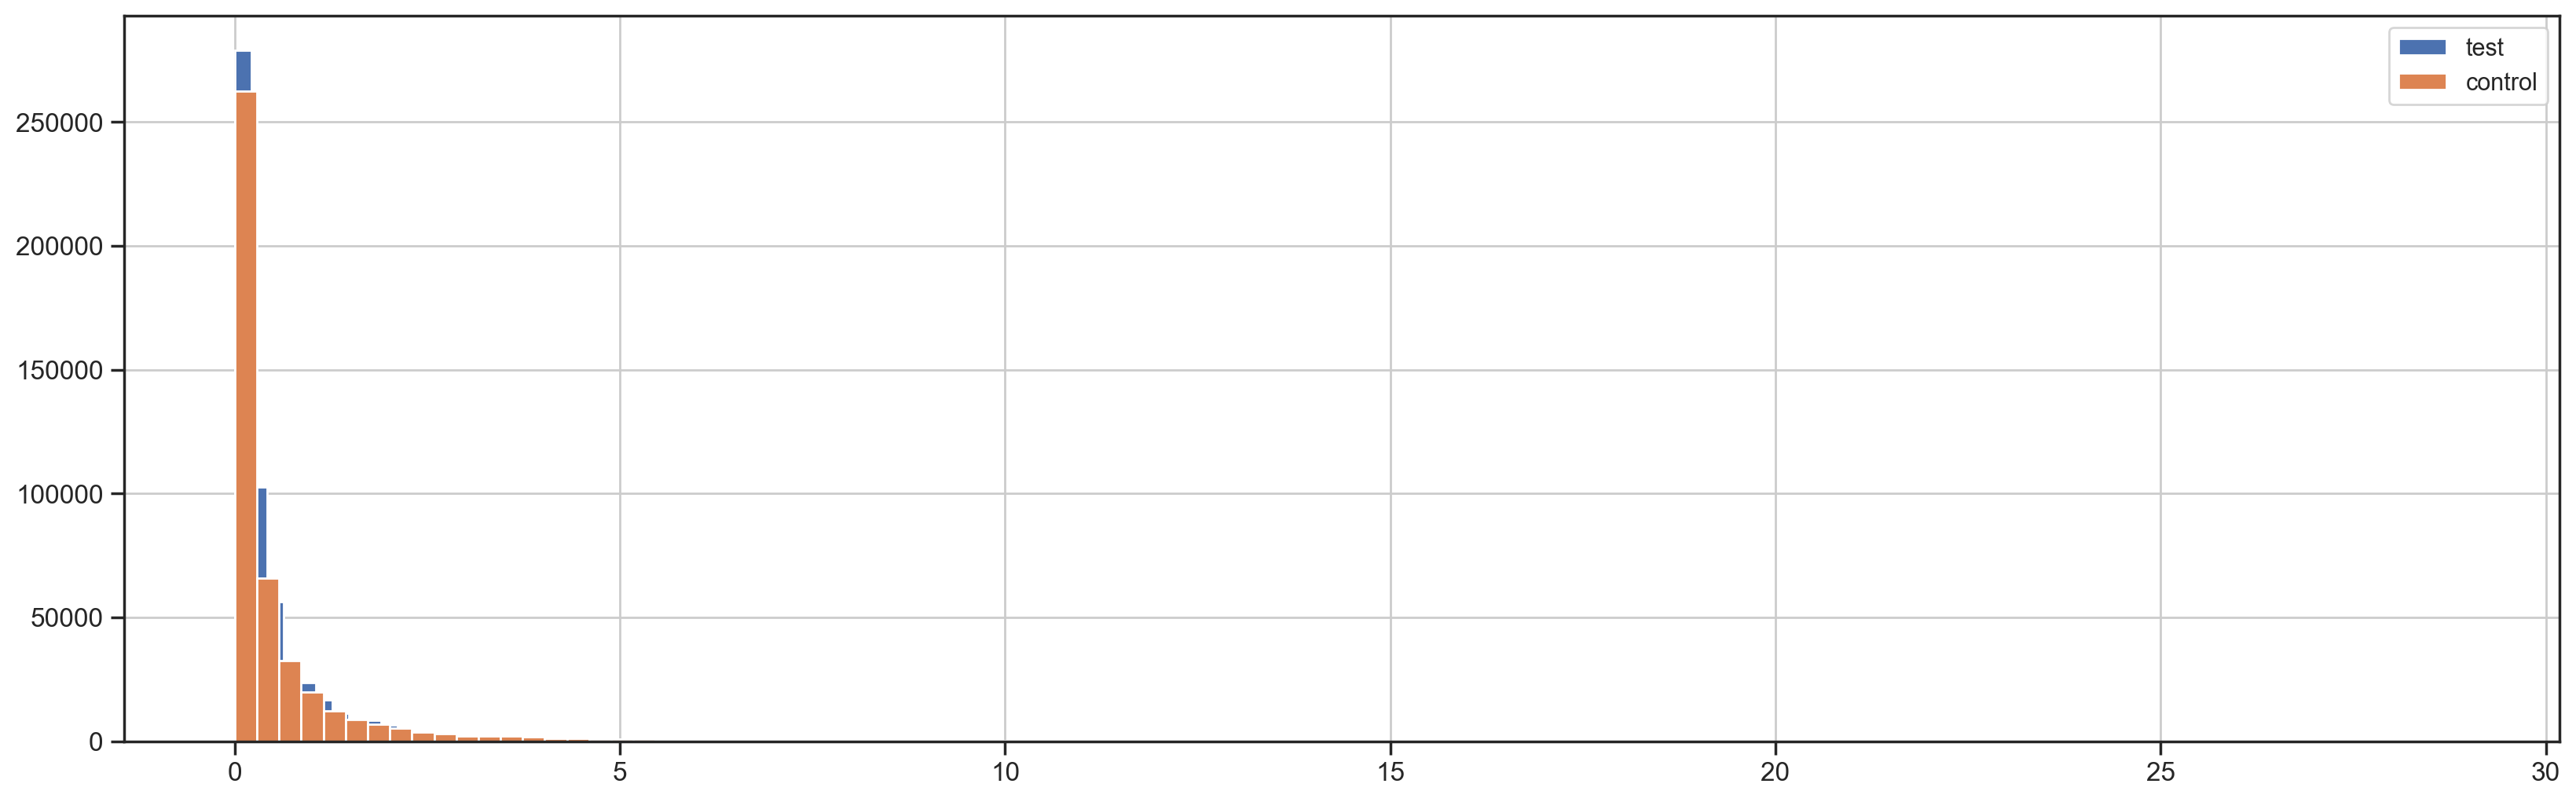

In [960]:
# посмотрим на распределение общего дохода с пользователя.
# Метрика имеет вид экспоненциального распределения.

test.total_rev.hist(bins=100, label='test')
control.total_rev.hist(bins=100, label='control')
plt.legend(loc='best')

In [962]:
# Распределение метрики total_rev имеет ненормальную природу распределения.
# Для проверки гипотезы, что ревеню с пользователя в тесте стат значимо отличается от контрола,
# воспользуемся непараметрическим тестом Манна — Уитни.

#p-value < .05 - стат значимые различия между выборками есть
stats.mannwhitneyu(test.total_rev, control.total_rev)

MannwhitneyuResult(statistic=136095564419.5, pvalue=0.0)

### Применение метода bootstrap

In [939]:
# Выделим в отдельные датасеты контрол и тест по всему доходу на пользователя
users_control = control[['total_rev', 'user_id']].drop_duplicates()
users_test = test[['total_rev', 'user_id']].drop_duplicates()

In [977]:
# с помощью bootstrap посмотрим как изменилась наша метрика total_rev в тесте и контроле
delta_mean = []

for n_inter in tqdm(range(5000)):
    #случайно выбираем элементы в двух выборках с повторением
    test_sample = np.random.choice(users_test['total_rev'], users_test.shape[0], replace=True)
    control_sample = np.random.choice(users_control['total_rev'], users_control.shape[0], replace=True)
    
    # делаем новую выборку из наших получившихся выборок.
    # Изменение общего дохода с пользователя в нашей тестовой выборке относительно контрольной
    delta = [x[0] - x[1] for x in zip(test_sample,control_sample)]
    
    #берем среднее выборки
    delta_mean.append(np.mean(delta))

100%|███████████████████████████████████████| 5000/5000 [01:06<00:00, 74.77it/s]


In [990]:
#посчитаем доверительный интервал для выборочных средних разности total_rev
lower = np.quantile(delta_mean, .025)
upper = np.quantile(delta_mean, .975)

mean = np.mean(delta_mean)
std = np.std(delta_mean)

print("выборочное среднее: {}\nстандартное отклонение: {}\nнижняя граница: {}\nверхняя граница: {}".format(mean, std, lower, upper))

выборочное среднее: 0.011369070188807407
стандартное отклонение: 0.0036091994715985185
нижняя граница: 0.004270390689664114
верхняя граница: 0.018423015118273125


### Вывод
Так как ноль не попадает в доверительный интервал выборочного среднего для разностей дохода с пользователя в контрольной и тестовой выборках, следовательно у нас есть статистически значимые изменения в общем доходе с пользователя. Таким образом можно сказать, что доход на пользователя в тестовой выборке вырос в среднем от 0.004 до 0.018 центов.

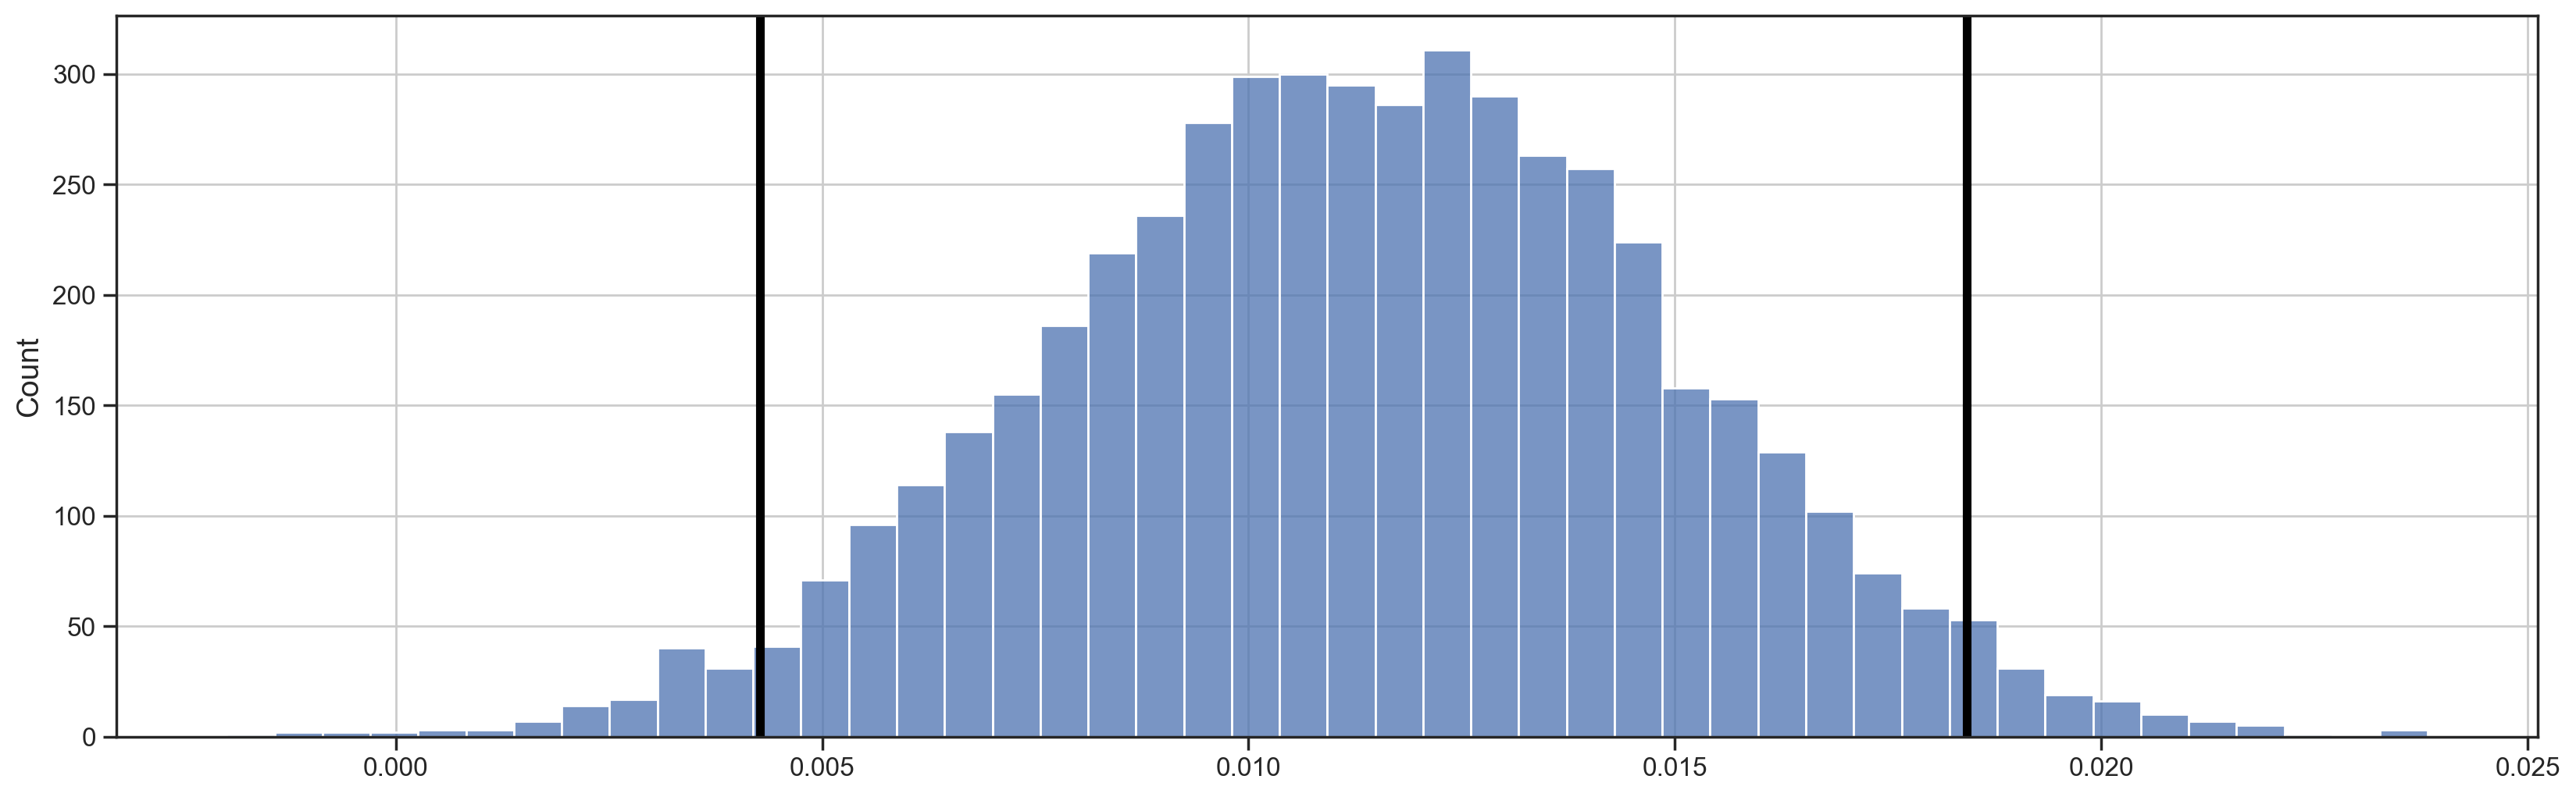

In [986]:
sns.histplot(delta_mean)
plt.axvline(x=lower, linewidth=4, color='black')
plt.axvline(x=upper, linewidth=4, color='black')

Посмотрим, в какую сторону изменился общий доход в тесте и контроле с появление нового типа рекламы

In [991]:
#Используем бутстрап
delta_sum = []

for n_inter in tqdm(range(5000)):
    #здесь мы берем выборки дохода по типу рекламы
    test_sample = np.random.choice(test['value'], test.shape[0], replace=True)
    control_sample = np.random.choice(control['value'], control.shape[0], replace=True)
    
    #в получившихся выборках складываем все элементы и берем их разность в новую выборку
    delta_sum.append(np.sum(test_sample) - np.sum(control_sample))

100%|███████████████████████████████████████| 5000/5000 [01:28<00:00, 56.48it/s]

0.011369070188807407 0.0036091994715985185 556.7637983631225 792.8314995897535


In [993]:
#посчитаем доверительный интервал
lower = np.quantile(delta_sum, .025)
upper = np.quantile(delta_sum, .975)

mean = np.mean(delta_sum)
std = np.std(delta_sum)

print("выборочное среднее: {}\nстандартное отклонение: {}\nнижняя граница: {}\nверхняя граница: {}".format(mean, std, lower, upper))

выборочное среднее: 673.7447065361671
стандартное отклонение: 61.88529839123752
нижняя граница: 556.7637983631225
верхняя граница: 792.8314995897535


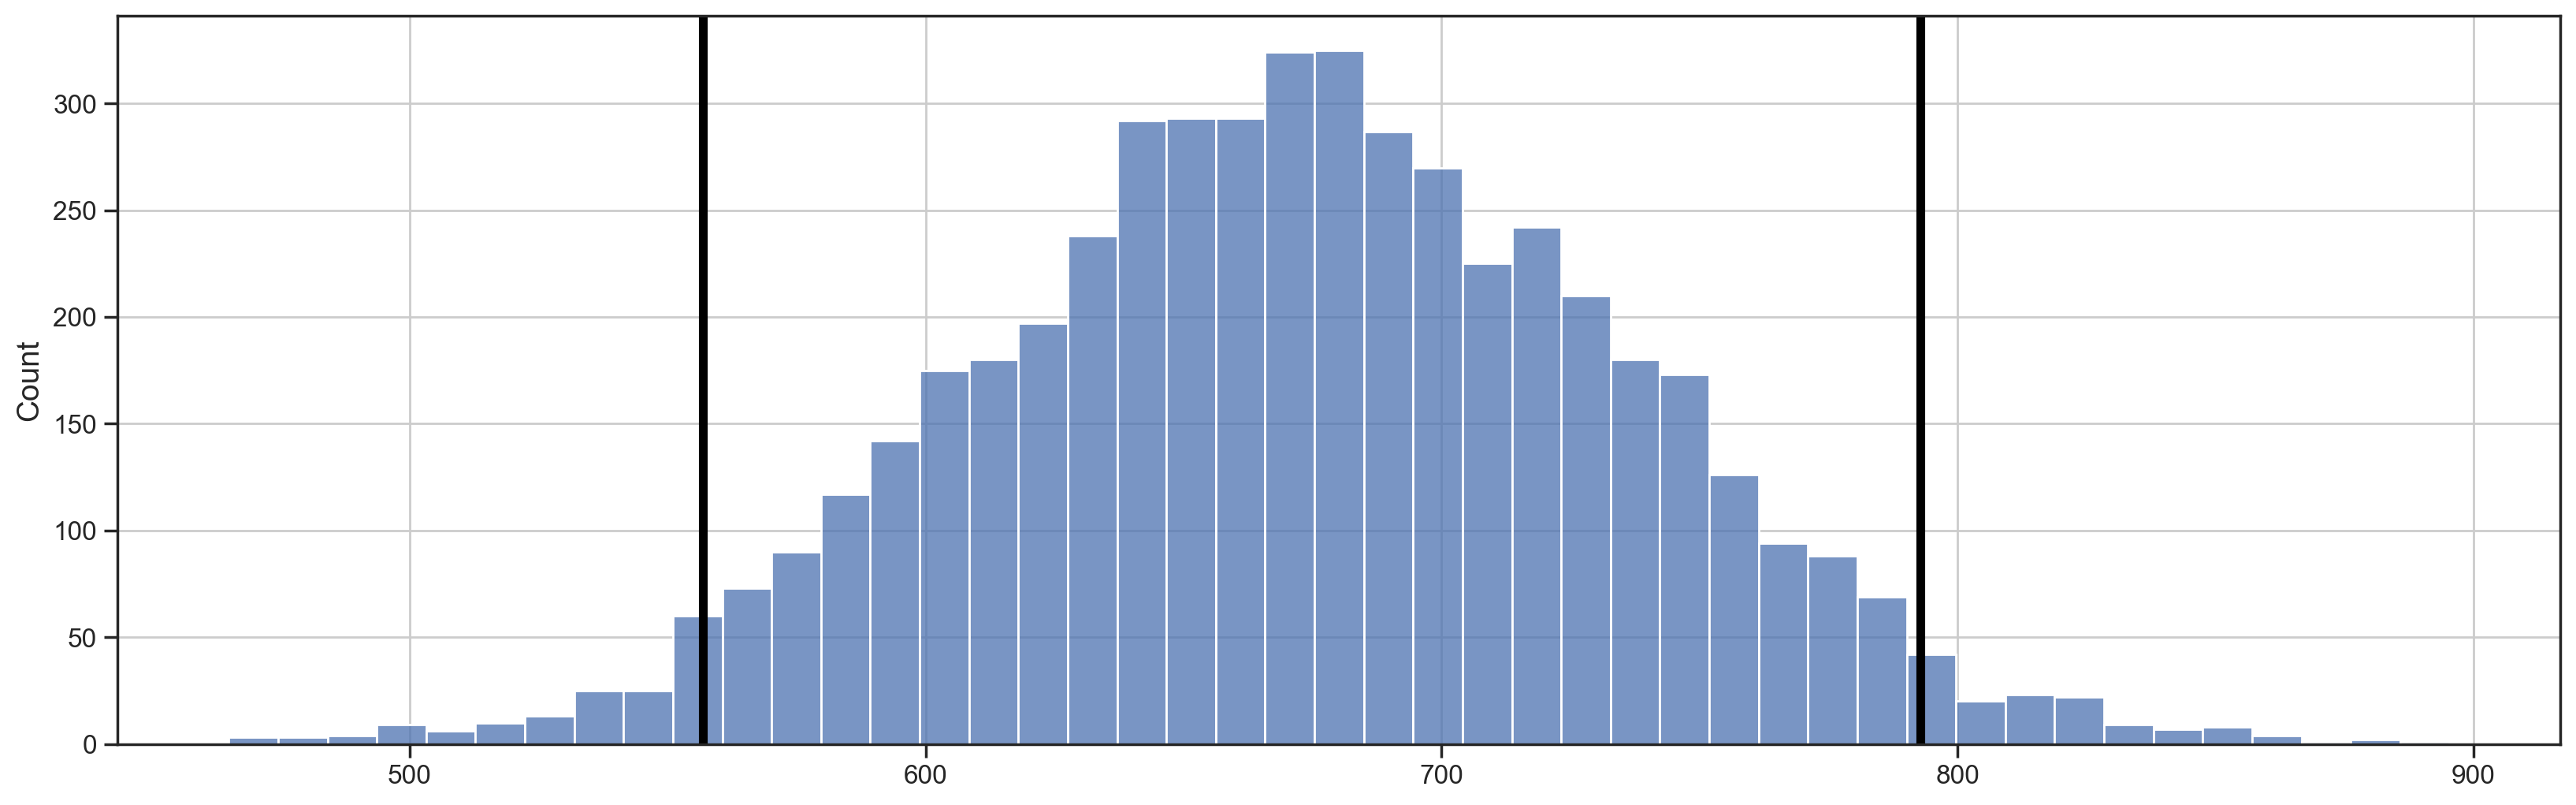

In [995]:
sns.histplot(delta_sum)
plt.axvline(x=lower, linewidth=4, color='black')
plt.axvline(x=upper, linewidth=4, color='black')

### Общие выводы по результата а/в теста
Таким образом эксперимент показал, что внедрение нового типа рекламы положительно влияет на общий доход с пользователя и доход со всех типов рекламы. Среднее изменение дохода с пользователя расположено в диапазоне от 0.004 до .018. Общий доход за время эксперимента вырос от 556.76 до 792.83 долларов.